# Exploring Statistical Methods: Permutations, Distributions, and Hypothesis Testing

In this assignment, we will explore several fundamental statistical techniques using Python and the numpy library. The four tasks cover a range of methods useful for analyzing data and performing hypothesis tests:

**Task 1: Permutations and Combinations** — We will calculate and understand the concepts of permutations and combinations, essential for combinatorial probability.  

**Task 2: numpy's Normal Distribution** — This task will demonstrate how to use numpy to generate and visualize data following a normal distribution.  

**Task 3: t-Test Calculation** — We will perform a t-test to compare the means of two datasets and understand its significance.  

**Task 4: ANOVA** — This task will cover the Analysis of Variance (ANOVA) to assess the statistical differences between multiple groups.  

These tasks will provide a hands-on approach to understanding and applying statistical methods in Python.  

The first step will then be importing the necessary libraries that will allow all the above studies:

1. **math**:
   - The `math` library provides a set of mathematical functions such as logarithms, square roots, trigonometric functions, and constants (e.g., π). It's essential for carrying out basic mathematical operations that are required for statistical calculations, including those used in permutations and combinations, as well as other numerical analyses.

2. **itertools**:
   - The `itertools` library is used for creating iterators for efficient looping, such as calculating permutations and combinations. It provides functions like `permutations()` and `combinations()`, which are directly applicable in combinatorial analysis. This library helps in generating sequences without the need to manually implement the logic.

3. **random**:
   - The `random` library allows for random selections, which is necessary when dealing with sampling methods, such as simulating datasets, shuffling data, or generating random variables. It will be helpful for tasks like creating random samples from distributions or testing hypothesis.

4. **numpy**:
   - `numpy` is a core library for numerical computing in Python. It provides support for arrays and matrices, along with a vast range of mathematical functions for numerical operations. `numpy` is crucial for generating random data, performing array manipulations, and applying advanced mathematical functions—particularly when working with large datasets and statistical distributions, such as the normal distribution.

5. **matplotlib.pyplot**:
   - `matplotlib.pyplot` is a plotting library used to create static, animated, and interactive visualizations in Python. It is essential for graphing data distributions, such as visualizing the normal distribution or plotting results from hypothesis tests like the t-test or ANOVA. Visualizations are key to interpreting and presenting data clearly.

6. **scipy.stats**:
   - `scipy.stats` is a submodule of the `scipy` library that provides a comprehensive range of statistical functions. It includes tools for hypothesis testing, probability distributions, and statistical tests, such as the t-test and ANOVA. This library is vital for performing rigorous statistical analysis and hypothesis testing in the assignment.

7. **statsmodels**:
   - `statsmodels` is a library for statistical modeling, which includes tools for performing regression analysis, hypothesis testing, and statistical inference. It's useful for more advanced statistical models and tests that go beyond basic functions. This library will be beneficial when applying more complex statistical methods, like ANOVA or regression models.

8. **pandas**:
   - `pandas` is a powerful library for data manipulation and analysis, offering data structures like DataFrames and Series for handling structured data efficiently. It provides functions to clean, transform, and explore datasets, making it easier to preprocess data for statistical analysis or machine learning tasks. The library integrates well with other libraries like statsmodels and numpy, serving as a foundation for managing data in preparation for more advanced analyses.

9. **seaborn**:
   - `seaborn` is a Python data visualization library built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn simplifies complex visualizations like heatmaps, violin plots, and pair plots, making it ideal for exploring and presenting data. It integrates well with pandas for handling DataFrames and offers built-in themes and color palettes to enhance the visual appeal of plots.

These libraries were chosen for their efficiency, broad usage in the data science community, and their ability to work seamlessly together to carry out the required tasks in the assignment.

In [2]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html#module-math
import math

# Permutations and combinations
# https://docs.python.org/3/library/itertools.html#module-itertools
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html#module-random
import random

# Numerical structures and operations.
# https://numpy.org/devdocs/reference/index.html#numpy-reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

# Statistical models.
import statsmodels as sm

# Mathematical functions.
import math

# Data manipulation.
import pandas as pd

# Statistical plots.
import seaborn as sns

# General Contents

- [Task 1: Permutations and Combinations](#task-1-permutations-and-combinations)
- [Task 2: numpy's Normal Distribution](#task-2-numpys-normal-distribution)
- [Task 3: t-Test Calculation](#task-3-t-test-calculation)
- [Task 4: ANOVA](#task-4-anova)


# Task 1: Permutations and Combinations


    Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

    Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

    Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

    Would you accept two errors? Explain.

## Lady Tasting Tea

## Table of Contents

1. [NULL HYPOTHESIS](#null-hypothesis)  
2. [QUESTION NO1](#question-no1)
3. [QUESTION NO2](#question-no2)
4. [QUESTION NO3](#question-no3)

### NULL HYPOTHESIS

    The lady has no special powers in figuring it out and she is just guessing.

### QUESTION NO1

    Calculate, using Python, the probability that they select the correct six cups.

**Our *Null* Hypothesis asserts that the lady is guessing, meaning her selections are random. The probability under the null hypothesis represents the likelihood of randomly selecting the correct 6 cups without any real ability to distinguish between tea-first and milk-first.**

By conducting this experiment, we intend to prove whether the person’s ability to identify the preparation method of the tea cups is beyond random chance. If the person can consistently and accurately identify all six milk-first cups, the evidence would support the claim that they possess a special sensory ability. Conversely, if their success rate aligns with what would be expected by random guessing, the claim would lack statistical support.

In summary, this experiment serves as a practical application of hypothesis testing, allowing us to objectively evaluate extraordinary claims using statistical evidence.

*By setting up this experiment, we can:*

- **Quantify Confidence**: Determine the likelihood that the person’s success is due to random chance versus a genuine ability.
+ **Statistical Significance**: Establish whether the results are statistically significant, meaning the observed outcome is unlikely to have occurred under the null hypothesis.
* **Objective Evaluation**: Provide an objective framework to evaluate claims of special abilities, ensuring decisions are based on evidence and probability rather than subjective judgment.

![image](images/lady_tasting_tea.png)

The key concepts that can guide us to establish the statistical relevance of a test are the following:

### Permutations
    
A permutation is an ordering of its elements.

The set `{a, b, c}` has the permutations `abc`, `acb`, `bac`, `bca`, `cab`, and `cba`.

### Combinations

A combination is a selection of `k` elements from a set of size `n`.

In combinations, order does not matter and the same element cannot be selected twice.

The combinations of size 2 from the set `{a, b, c}` are `{a, b}`, `{a, c}`, and `{b, c}`.

=> In this case, since the experiment involves selecting cups where **order does not matter**, and **each cup is chosen without replacement**, the statistical relevance of the test is fundamentally  based on the concept of **combinations**. This ensures that the analysis focuses solely on the subsets of cups chosen, rather than the sequence in which they are selected.


Before assessing our *null* hypothesis we will proceed by calculating the number of ways to choose **k** elements from a set of **n** elements, 6 cups from a set of 12 cups in our case, where the order of the chosen elements does not matter and no element is selected more than once.

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk first.
no_cups_milk_first = 6

# Number of cups of tea with tea first.
no_cups_tea_first = 6

How many possible combinations are there to shuffle the 12 cups?  

In orther to identify the precise number we are using the [`math.comb()`](https://docs.python.org/3/library/math.html#math.comb') function from the *math* library.


In [3]:
# Number of ways of selecting six cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

The value 924 quantifies the total possible ways to arrange the selection of 6 milk-first cups among the 12 cups. This number is useful for determining the probability of correctly guessing the arrangement purely by chance, which can then be compared to the actual results to test statistical significance.

In mathematics, the **combination** function is called the *choose* function:


$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

* $n!$: The factorial of $n$  
We have 12 cups from which selecting the samples and the factorial of 12 is: 479001600.
1 * 2 * 3 * 4 * 5 * 6 * 7 * 8 * 9 * 10 * 11 * 12 = 479001600

In [4]:
#  Factorial of the total number of cups n.
fact_no_cups = 1 * 2 * 3 * 4 * 5 * 6 * 7 * 8 * 9 * 10 * 11 * 12

# Show.
fact_no_cups

479001600

* $k!$: The factorial of $k$  

We need to select 6 random cups and the possible ways these cups can be selected is represented by factorial of this same sample, 6: 720  

$k! = 6 x 5 x 4 x 3 x 2 x 1$

In [5]:
#  Factorial of the total number of cups n.
fact_samples = 1 * 2 * 3 * 4 * 5 * 6

# Show.
fact_samples

720

* $(n−k)!$: The factorial of the difference between $n$ and $k$ is 720 as well.

$(n - k)! = (12 -6)! = 6! = 6 x 5 x 4 x 3 x 2 x 1 = 720$

In [6]:
# Factorial of the diffetence between n and k.
fact_diff = 6 * 5 * 4 * 3 * 2 * 1

fact_diff

720

In [7]:
# Applying the combination formula.
no_total_selection = fact_no_cups // (fact_samples * fact_diff)

# Show.
no_total_selection

924

```  
n! = 12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1  
k! = 6 x 5 x 4 x 3 x 2 x 1  
(n - k)! = 6 x 5 x 4 x 3 x 2 x 1  
n!/(n-k) = (12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1) / (6 x 5 x 4 x 3 x 2 x 1) = 12 x 11 x 10 x 9 x 8 x 7 x 6 x 5  
```  

**The formula of COMBINATION** confirms the number of 924 as number of possible combinations **where the order does not matter**. 

On the contrary, in case we would consider the order of selection the number of possible outcomes would increase to 665280 following **the formula of PERMUTATION** => **where the order does matter**.  

The formula for permutations is:  

$$P(n, k) = \frac{n!}{(n-k)!}$$

In this case:

$n$=12 (total cups)  
$k$=6 (number of cups selected)  

Step-by-Step Simplification:
Start with the full factorial expression:  
$P(12, 6) = \frac{12!}{(12-6)!} = \frac{12!}{(6)!}$
 
Expand:

$12!$ and cancel out terms with $6!$:  

$12!=12×11×10×9×8×7×6!$

So, 6! in the numerator and denominator cancel out.  
Simplified expression:  

$P(12,6)=12×11×10×9×8×7$

In [8]:
# Total number of ways of selecting six cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7

# Show.
ways_ordered

665280

In [9]:
# Number of ways of shuffling six cups.
no_shuffles = 6 * 5 * 4 * 3 * 2 * 1

# Show.
no_shuffles

720

720 ways of ordering 6 elements.

In [10]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

924

The [math.factorial](https://docs.python.org/3/library/math.html#math.factorial) function can provide a simpler and more efficient manner to apply the *choose* function.

In [12]:
# Number of cups
n = 12

# Number of cups of tea with milk/tea first.
k = 6

# Factorial on number of cups.
fact_n = math.factorial(n)

# Factorial of number of cups of tea with milk/tea first.
fact_k = math.factorial(k)

# Factorial of  number of cups - number of cups of tea with milk/tea first.
diff_n_k =  n-k
fact_diff_n_k = math.factorial(diff_n_k)

# Applying formula: COMBINATION
# No of ways of selecting k objects from n without replacement and without order.
comb = fact_n // (fact_k * fact_diff_n_k)

# Show result.
comb

924

The probability of selecting the correct 6 cups is based on the number of favorable outcomes (1 correct combination) divided by the total possible combinations is then calculated as follows:

$$P = \frac{\text{Number of Correct Combinations}}{\text{Total Combinations}}.$$

Substituting the values from above total combinations number (924) and the correct combinations (1 because there is only one way to select the 6 correct cup).

$$P = \frac{{1}}{{924}}$$

In [13]:
# Probability of selecting the correct 6 cups
probability_correct = 1 / comb

probability_correct

0.0010822510822510823

### ANSWER NO1 

Allowing no error in the identification of the correct 6 cups in a set of 6 cups randomly chosen out of 12 corresponds to a probability of approximately $0.108\% (P = \frac{{1}}{{924}})$. 

If we maintain the significance level at &α=0.05$ ($5\%$, the normal convention), the computed $p$-value of $0.001$ (or $0.1\%$) is much smaller than the significance threshold. Therefore, we reject the null hypothesis (that the lady cannot tell the difference) and accept the alternative hypothesis, namely, that the lady can distinguish between the cups.

==> **EVIDENCE**

Fisher: if the lady is just picking six cups at random, then it is unlikely she will pick the correct six. The probability is one in nine hundred twenty-four. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea.

In [14]:
# The probability in percentage that she (randomly) selects the six correct cups.
cert_percentage = round((1 / 924) *100, 3)

# Show.
print(cert_percentage)

0.108


### QUESTION NO2

    Calculate the probability, assuming they have no special powers, that the person makes at most one error.

If we can calculate the probability of selecting all 6 correct cups by considering the single favorable case out of all possible combinations, **the number of favorable cases increases if we allow for the possibility of one error**. This is because there are multiple ways to select subsets of 6 cups where 5 cups are correct and 1 is incorrect. To compute this probability accurately, **we must consider and calculate the overlaps**, which represent the number of correctly identified cups within a selection. *Overlaps quantify how many of the selected cups match the predefined "correct" group* (e.g., milk-first cups). By categorizing outcomes based on the number of overlaps (e.g., 6, 5, 4 correct cups, etc.), we can systematically evaluate the probabilities for scenarios with varying levels of correctness, allowing for precise calculations when errors are permitted.  

To calculate the overlaps, it is necessary to label the cups in order to uniquely identify each sample. We then use the [`itertools`](https://docs.python.org/3/library/itertools.html#itertools.combinations) package to determine all possible ways of selecting cups from the total cups of tea. This is done using the combinations function from the `itertools` package, which generates all unique combinations of the specified size (`no_cups_milk_first`) from the set of labeled cups. The `itertools` package is efficient for generating combinations and other permutations, making it ideal for this kind of combinatorial analysis.

In [15]:
# The cups labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

`labels` creates a list of cup labels from 0 to `no_cups - 1`.

In [16]:
# Shiw the different ways of selecting no_cups+milk_first out of no_cuos cups of tea.
combs = list(itertools.combinations(labels,no_cups_milk_first))

# Show,
combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [17]:
len(combs)

924

As already highlighted, we have 924 possible combinations.

In [18]:
# Select six cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 6)

# Sort in place.
labels_milk.sort()

# Show
labels_milk

[0, 2, 3, 7, 9, 11]

This code simulates a random selection of 6 cups, showing one possible combination out of the 924 possible selections: `[0, 2, 3, 7, 9, 11]`. The `sort()` method orders the selected cups and `labels_milk` displays the selected cups that will have milk poured first, simulating a random configuration.

In [19]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 2, 3, 7, 9, 11}

To calculate the overlaps when allowing the possibility of a mistake in selecting 6 cups, we compare each combination of cups (`combs`) with the predefined "milk-first" cups (`labels_milk`). For each combination, we convert it into a set and compute its intersection with the set of milk-first cups, which identifies the correctly selected cups in that combination. The size of this overlap, representing the number of correct selections, is recorded and stored in the list no_overlaps for further analysis. This process ensures a systematic evaluation of overlaps across all possible combinations.  

The `intersection` function in Python is a method used with sets to find the common elements between two or more sets. It returns a new set containing only the elements that are present in all the sets being compared. Here, we use it to  determine which cups in the randomly chosen combination (`s1`) are also in the predefined "milk-first" group (`s2`). This step is essential for identifying correct selections and assessing overlaps.

In [20]:
# Calculate the overlap between each element of combs and labels_milk.
no_overlaps = []

for comb in combs:
    # Turn comb into a set.
    s1 = set(comb)
    # Turn labels_milk into a set.
    s2 = set(labels_milk)
    # Figure out where they overlap.
    overlap = s1.intersection(s2)
    print(comb, overlap, len(overlap))
    # Append overlaps to no_overlaps.
    no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {0, 2, 3} 3
(0, 1, 2, 3, 4, 6) {0, 2, 3} 3
(0, 1, 2, 3, 4, 7) {0, 2, 3, 7} 4
(0, 1, 2, 3, 4, 8) {0, 2, 3} 3
(0, 1, 2, 3, 4, 9) {0, 9, 2, 3} 4
(0, 1, 2, 3, 4, 10) {0, 2, 3} 3
(0, 1, 2, 3, 4, 11) {0, 11, 2, 3} 4
(0, 1, 2, 3, 5, 6) {0, 2, 3} 3
(0, 1, 2, 3, 5, 7) {0, 2, 3, 7} 4
(0, 1, 2, 3, 5, 8) {0, 2, 3} 3
(0, 1, 2, 3, 5, 9) {0, 9, 2, 3} 4
(0, 1, 2, 3, 5, 10) {0, 2, 3} 3
(0, 1, 2, 3, 5, 11) {0, 11, 2, 3} 4
(0, 1, 2, 3, 6, 7) {0, 2, 3, 7} 4
(0, 1, 2, 3, 6, 8) {0, 2, 3} 3
(0, 1, 2, 3, 6, 9) {0, 9, 2, 3} 4
(0, 1, 2, 3, 6, 10) {0, 2, 3} 3
(0, 1, 2, 3, 6, 11) {0, 11, 2, 3} 4
(0, 1, 2, 3, 7, 8) {0, 2, 3, 7} 4
(0, 1, 2, 3, 7, 9) {0, 2, 3, 7, 9} 5
(0, 1, 2, 3, 7, 10) {0, 2, 3, 7} 4
(0, 1, 2, 3, 7, 11) {0, 2, 3, 7, 11} 5
(0, 1, 2, 3, 8, 9) {0, 9, 2, 3} 4
(0, 1, 2, 3, 8, 10) {0, 2, 3} 3
(0, 1, 2, 3, 8, 11) {0, 11, 2, 3} 4
(0, 1, 2, 3, 9, 10) {0, 9, 2, 3} 4
(0, 1, 2, 3, 9, 11) {0, 2, 3, 9, 11} 5
(0, 1, 2, 3, 10, 11) {0, 11, 2, 3} 4
(0, 1, 2, 4, 5, 6) {0, 2} 2
(0, 1, 2, 4, 5, 7) {

In [21]:
# Show the overlaps.
print(no_overlaps)

[3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 4, 4, 5, 4, 5, 4, 3, 4, 4, 5, 4, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 4, 3, 4, 4, 5, 4, 3, 4, 3, 4, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 4, 3, 4, 4, 5, 4, 3, 4, 3, 4, 2, 1, 2, 1, 2, 2, 3, 2, 3, 2, 1, 2, 2, 3, 2, 2, 3, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 4, 4, 5, 4, 5, 4, 3, 4, 4, 5, 4, 4, 3, 4, 3, 4, 4, 5, 4, 5, 4, 3, 4, 4, 5, 4, 4, 5, 4, 5, 4, 3, 4, 4, 5, 4, 5, 4, 5, 5, 6, 5, 4, 5, 4, 5, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 4, 3, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 4, 3, 4, 4, 5, 4, 3, 4, 3, 4, 4, 3, 4, 4, 5, 4, 3, 4, 3, 4, 4, 5, 

By knowing the number of overlaps for each combination, we can classify the outcomes into categories (e.g., 6 correct, 5 correct, etc.) and transition from raw data to meaningful statistical insights that guide conclusions about the experiment.  

In fact, this allows us to determine how often specific levels of correctness occur, such as the probability of selecting exactly 5 correct cups: $P(5)$  

=> The probability $P$ is obtained by dividing the number of combinations for each overlap by the total number of possible combinations.

In [22]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Count the number of occurrences for each overlap size.
overlap_sizes, overlap_counts = np.unique(no_overlaps, return_counts=True)

# Create a DataFrame with "Number of Overlaps" as a column.
df = pd.DataFrame({
    "Number of Overlaps": overlap_sizes,
    "Combinations": overlap_counts
})

# Show the DataFrame without the row numbers.
print(df.to_string(index=False))

 Number of Overlaps  Combinations
                  0             1
                  1            36
                  2           225
                  3           400
                  4           225
                  5            36
                  6             1


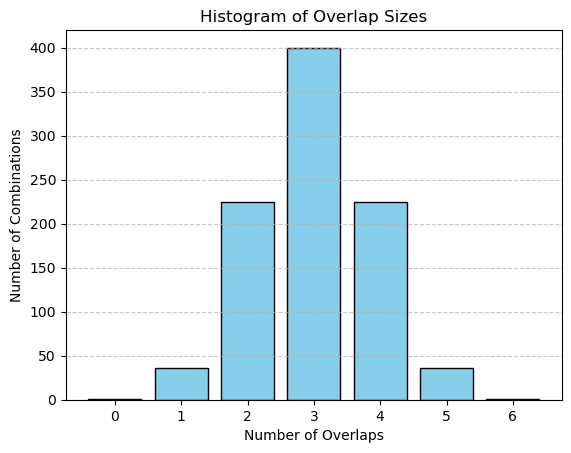

In [23]:
# Plot the histogram
plt.bar(df["Number of Overlaps"], df["Combinations"], color='skyblue', edgecolor='black')
plt.xlabel("Number of Overlaps")
plt.ylabel("Number of Combinations")
plt.title("Histogram of Overlap Sizes")
plt.xticks(df["Number of Overlaps"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The histogram exhibits a symmetrical bell-shaped curve, indicative of a normal distribution. The peak occurs at 3 overlaps, which is the most frequent outcome, while the counts decrease symmetrically as the overlap size moves away from the center toward 0 or 6. This symmetry arises because the experiment involves randomly selecting cups, and the combinations inherently favor a balanced distribution around the midpoint (3 overlaps). Such a distribution is expected due to the combinatorial nature of the problem, where the majority of arrangements are centered around the average case, with fewer possibilities for extreme cases (like all cups being correct or none being correct).

### ANSWER NO2 

If we consider the possibility of selecting at least 5 correct cups (allowing for either 0 or 1 error), the total number of favorable combinations is $36+1=37$. The corresponding percentage is:

$$Probability of at least 5 correct cups= \frac{{(1+36)}}{{924}}≈4.0%$$

In [24]:
# The probability that she (randomly) selects at least five correct cups.
cert_percentage1 = round(((1+36) / 924) * 100, 3)

# Show.
print(cert_percentage1)

4.004


=> The $p$-value of $0.04$ (or $4\%$) is smaller than the significance level ($α=0.05$ corresponding to $5\%$ of the normal convention), which is sufficient to reject the null hypothesis that the lady is just guessing.

### QUESTION NO3

Would you accept two errors? Explain.

Now, if we extend this to allow for two errors, we need to consider the probability of selecting at least 4 correct cups (i.e., 2 or fewer errors). The number of favorable combinations for selecting exactly 4 correct cups, 3 correct cups, and 2 correct cups (with 2, 3, or 4 incorrect cups, respectively) will be higher, leading to an increase in the total number of favorable outcomes. if we accept two errors the number of overlaps will increase to 262 over 924 possible combinations:  

$$225+36+1 = 262$$  

This represents the number of ways to select 4, 5, or 6 correct cups (allowing for 0, 1, or 2 errors).

Now, we can calculate the corresponding probability:

$$Probability of at least 4 correct cups= \frac{{(1+36+225)}}{{924}}≈28.4%$$

In [25]:
# The probability that she (randomly) selects at least four correct cups.
cert_percentage2 = round(((1+36+225) / 924) * 100, 3)

# Show.
print(cert_percentage2)

28.355


### ANSWER NO3

Accepting a 28.4% chance of success would undermine the significance of the entire experiment, as it would elevate the probability of success to nearly one-third — akin to the chance of selecting the correct card out of three.

=> The $p$-value of $0.284$ ($28.4\%$) is much larger than the significance level ($α=0.05$ corresponding to the $5\%$ of the standard convention), so, in this case, we must accept the null hypothesis that the lady is just guessing.

---

# Task 2: numpy's Normal Distribution

    In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

    Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

    Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

![image](images/normal_distribution.png)

### Numpy Random Nornal Distribution

The following script is implemented referring to the [Numpy](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html#numpy-random-normal) ufficial documentation.

In [26]:
# Generate one hundred thousand values with mean 10.0 and standard deviation 3.0.
sample = np.random.normal(loc=10.0,scale=3.0, size=100000)

# Show.
sample

array([ 8.28757084, 10.53032802,  9.79144922, ...,  9.69802746,
        9.35668312,  4.70154227])

### Shapiro-Wilk Test

In [39]:
# Perform the Shapiro-Wilk test for normality.
shapiro_test_stat, shapiro_p_value = stats.shapiro(sample)  # Use a subset for computational efficiency.

shapiro_test_stat, shapiro_p_value

(0.9999861216553201, 0.9919100849615661)

The Shapiro-Wilk test was performed on a subset of the sample to test whether it comes from a normal distribution. Here are the results:

Test Statistic:   
$W=0.9999$  
p-value:  
$p=0.9991$

Null Hypothesis (H0): The data is drawn from a normal distribution.  
Alternative Hypothesis (Ha): The data is not drawn from a normal distribution.  

A high p-value (typically greater than 0.05) means we fail to reject the null hypothesis:  
=>Since the result corresponds to $p=0.9991$, which is much greater than 0.05, we do not have sufficient evidence to reject H0.

The Shapiro-Wilk test then suggests that the sample is consistent with being drawn from a normal distribution. This evaluation was deployed following the instructions on [GeeksforGeeks](https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/). 

### Plotting

The following histogram is plotted using [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist) and helps visualizing the sample generated through [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram).  

The [normal distribution formula](https://en.wikipedia.org/wiki/Normal_distribution) is the following:

$$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

where $\mu$ is the mean and $\sigma$ the standard deviation. The square of the standard deviation, $\mu^2$, is called the variance.  

The normal distribution formula can be implemented through a Python function as follows:

In [ ]:
# Define the custom normal distribution function.
def f(x, mu=0.0, sigma=1.0):
    norm = 1.0 / np.sqrt(2.0 * np.pi * sigma**2)  # Normalization constant.
    return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))  # PDF

This function can offer another method to check if the sample analyzed is normally distributed by plotting the probability density function over the histogram of the numerical data.

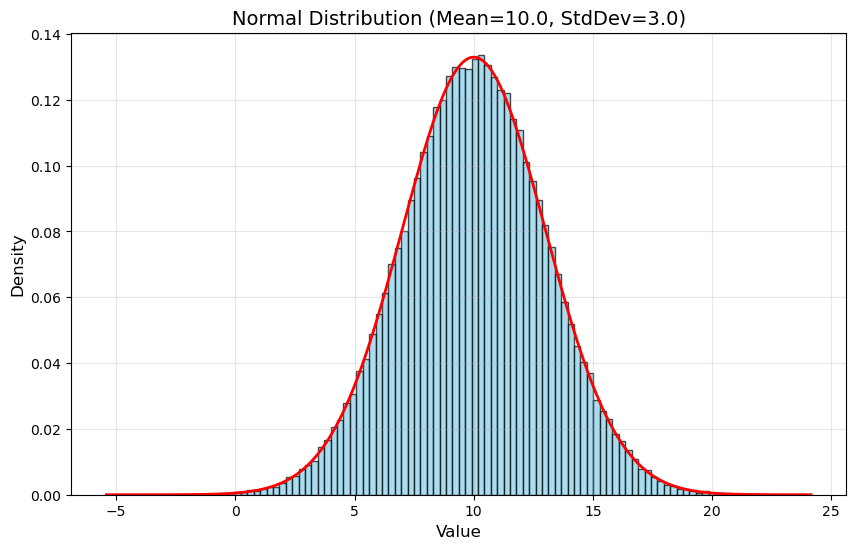

In [52]:
# Create histogram to show the distribution.
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=100, density=True, color='skyblue', alpha=0.7, edgecolor='black')

# Create an x range for the PDF plot (similar to the range of the sample data).
xmin, xmax = plt.xlim()  # Get the limits of the x-axis.
x = np.linspace(xmin, xmax, 1001)  # Generate 1001 points between xmin and xmax.

# Calculate the PDF using the custom function.
y = f(x, mu=10.0, sigma=3.0)

# Overlay the PDF on the histogram.
plt.plot(x, y, 'r', lw=2)  # Plot the PDF as a red line.

# Set title and labels.
plt.title(f"Normal Distribution (Mean={10.0}, StdDev={3.0})", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)

# Show the plot.
plt.show()

The x-range for plotting the PDF is generated with `np.linspace`, and the  probability density function is computed for the range given. The `np.linspace(xmin, xmax, 1001)` creates 1001 equally spaced points between the xmin and xmax values (the range of the histogram's x-axis). These points serve as the x-values for plotting the PDF (probability density function). The x array deployed by np.linspace is used to calculate the corresponding y-values of the PDF using the function f(x, mu, sigma). The smooth curve of the PDF is then plotted over the histogram using these points.  

This graph, therefore, displays the classic **bell-shaped curve**, which is symmetric around the mean along with the custom normal distribution curve overlaid in red. This symmetry is a hallmark of a normal distribution, indicating that most of the data points are concentrated around the central value (mean). The highest point of the histogram occurs at approximately 10, which corresponds to the mean. This is expected since the normal distribution's peak aligns with its mean. The spread of the distribution (width of the bell) reflects the standard deviation. In this case, 68% of the data lies within one standard deviation (7 to 13) of the mean, while 95% lies within two standard deviations (4 to 16). This conforms to the empirical rule. The quantification of data within one and two standard deviations is as follows:  

- 68% of the data within one standard deviation (7 to 13):   
$[\left[\mu - \sigma, \mu + \sigma\right] = [7, 13]]$  
- 95% of the data within two standard deviations (4 to 16):    
$[\left[\mu - 2\sigma, \mu + 2\sigma\right] = [4, 16]]$  

In [32]:
# Calculate the ranges for 1 and 2 standard deviations from the mean
mean = 10.0
std_dev = 3.0

range_1_std = (mean - std_dev, mean + std_dev)  # 1 standard deviation (7 to 13)
range_2_std = (mean - 2 * std_dev, mean + 2 * std_dev)  # 2 standard deviations (4 to 16)

# Count data points within these ranges
within_1_std = np.sum((sample >= range_1_std[0]) & (sample <= range_1_std[1])) / len(sample) * 100
within_2_std = np.sum((sample >= range_2_std[0]) & (sample <= range_2_std[1])) / len(sample) * 100

within_1_std, within_2_std

(68.29899999999999, 95.392)

My main point of reference for all the calculations concerning the standard deviation is [Leanscape](https://leanscape.io/demystifying-standard-deviation-a-beginners-guide/).

# Task 3: t-Test Calculation

![image](images/t_test.png)

## $t$-Tests

    Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

    | Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
    |------------|----|----|----|----|----|----|----|----|----|----|
    | Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
    | After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |


    Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

A **t-test** is a statistical test used to compare the means of two groups to determine if they are significantly different from each other. It is commonly used when the sample sizes are small and the population variance is unknown.  

Types of t-tests:  
- **One-sample t-test**: Compares the mean of a single sample to a known or hypothesized population mean.
- **Independent two-sample t-test**: Compares the means of two independent groups.
- **Paired t-test**: Compares the means of two related groups.

Considering the given dataset, where each patient's measurements are compared to their baseline, we aim to determine if there is a statistically significant difference between the "Before" and "After" measurements. This objective can typically be achieved using a **paired t-test**. 

The **t-test** evaluates whether the difference between the sample means is large enough to be unlikely under the *null hypothesis*, which assumes there is no difference between the means. It uses the t-statistic, which measures how far the observed sample difference is from the null hypothesis, in terms of the standard error:  

- *Null hypothesis* ($H_0$): 
The means of the groups are equal.
- Alternative hypothesis ($H_1$): 
The means of the groups are different.

=> In the case analysed, the null hypothesis is that the two groups are not significantly different or $\mu_{\text{before}} = \mu_{\text{after}}$. While the alternative hypothesis is that the two groups are significantly different or $H_1: \mu_{\text{before}} \neq \mu_{\text{after}}$.

While the theoretical part of the present study is based on [DATAtab](https://datatab.net/tutorial/paired-t-test), the following paired t-test is performed following [Python for Data Science](https://pythonfordatascienceorg.wordpress.com/paired-samples-t-test-python/). 

### ASSUMPTIONS

Before determining whether we can accept or reject the null hypothesis, it is important to check two key assumptions: that **the difference between the paired observations are approximately normally distributed and that the pairs are independent of each other**. These assumptions are essential for the validity of the t-test. In fact, if the differences deviate significantly from normality, the t-test may produce inaccurate results, leading to a higher risk of Type I or Type II errors. On the other hand, the assumption of independence is critical because paired observations should represent different experimental units or subjects, ensuring that the test evaluates the true relationship between the two conditions without bias from related measurements. If the pairs are not independent, the results of the t-test may not be valid, as the test would incorrectly treat dependent observations as independent, leading to invalid conclusions about statistical significance. Thus, ensuring these assumptions hold is essential for the reliability and validity of the t-test.  

- **Type I Error (False Positive)**: Occurs when the null hypothesis is incorrectly rejected when it is actually true. In other words, a true effect is not present, but the test concludes that it is. The probability of making a Type I error is denoted by $α$ (significance level), typically set at 0.05.  
- **Type II Error (False Negative)**: Occurs when the null hypothesis is incorrectly not rejected when it is actually false. This means the test fails to detect a true effect. The probability of a Type II error is denoted by $β$.
- **Power**: The probability of correctly rejecting the null hypothesis when it is false, i.e., detecting a true effect. Power is calculated as $1−β$. High power reduces the risk of a Type II error and is influenced by factors like sample size, effect size, and significance level.

For further information on Type I and Type II errors please refer to: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors. While for what concerns the Power error my reference is the following: https://en.wikipedia.org/wiki/Power_(statistics).

CONDITION 1 => **The difference between the paired observations is approximately normally distributed.** 

In order to proceed to our calculation, we will create too variables, `before` and `after`, that will used all along the current study: 

In [3]:
# Define the "Before" and "After" data.
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

To check if the difference between the paired observations is approximately normally distributed, we can again plot the values as histograms and create an x range for the probability density function to see if its curve is bell shaped and visually ressemble.

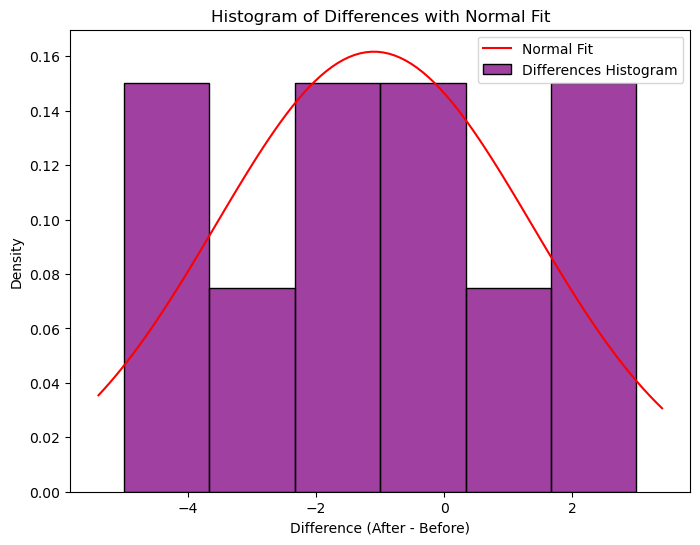

In [ ]:
# Importing norm module from Scipy stats to create a normal distribution.
from scipy.stats import norm

# Calculate differences.
differences = after - before

# Plot histogram for differences with normal distribution fit.
plt.figure(figsize=(8, 6))
sns.histplot(differences, kde=False, color='purple', stat='density', bins=6, label='Differences Histogram')

# Normal distribution fit.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(differences), np.std(differences)
plt.plot(x, norm.pdf(x, mu, std), 'r-', label='Normal Fit')

# Customize plot.
plt.title('Histogram of Differences with Normal Fit')
plt.xlabel('Difference (After - Before)')
plt.ylabel('Density')
plt.legend()
plt.show()

The above plots shows that the difference of paired observations, along with a red curve representing the probability density function (PDF) of a normal distribution, align well with the red curve in the middle but not in its extreems. However, visual alignment alone can be misleading, especially with small sample sizes like this one: to rigorously assess normality, we can penform a statistical test. such as the **Shapiro-Wilk**.

In [6]:
# Importing the shapiro module from Scipy stats to test normality on data distribution.
from scipy.stats import shapiro

# Perform Shapiro-Wilk test on the differences
stat, p_value = shapiro(differences)

stat, p_value

(0.9752339025839641, 0.9346854448707635)

The Shapiro-Wilk test results are:

Test Statistic: 0.9752  
p-value: 0.9347

CONDITION 1 SATISFIED: Since the p-value (0.9347) is much greater than 0.05, the differences appear to be normally distributed. This supports the validity of using a paired t-test for this dataset.
The null hypothesis (H₀) of the Shapiro-Wilk test is that the data follows a normal distribution.
A p-value > 0.05 indicates that we fail to reject the null hypothesis, suggesting no significant departure from normality.

CONDITION 2 => The pairs are independent of each other.

To test if the two samples (Before and After) are independent using a correlation test, we can perform a Pearson correlation when the data, as in this case, is continuous and normally distributed. As a matter of fact, the `.corr()` method in Pandas computes the Pearson correlation coefficient by default and confirm that there is no correlation and, therefore, the two samples are independent.  

The correlation coefficient value ranges from -1 to 1:  

1 indicates a perfect positive linear relationship.  
-1 indicates a perfect negative linear relationship.   
0 indicates no linear relationship.  

In [17]:
# Calculate the Pearson correlation coefficient between 'Before' and 'After'
correlation = df['Before'].corr(df['After'])

print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.8918749396570719


CONDITION 2 NOT SATISFIED: With a Pearson correlation coefficient of 0.8919, the two variables, "Before" and "After," are not independent. This high correlation indicates a strong positive linear relationship between the two variables. Despite this, we will proceed to perform a t-test on the samples and test the null hypothesis that the means of the two groups are equal.

### t-Test

The paired t-test is calculated as:

$$t = \frac{\bar{D}}{\frac{s_D}{\sqrt{n}}}$$  
where:  
 
${\bar{D}}$ is the mean of the differences between the paired observations $D_i = \text{Before}_i - \text{After}_i$.  

${s_D}$ is the standard deviation of the differences.  

${n}$ is the number of paired observations. 

- Step 1: Calculate the differences $D_i = \text{Before}_i - \text{After}_i$.  

In order to perform this calculation, the "before" and "after" data is transformed into NumPy arrays and their differences is stored into a variable called `differences`.

In [ ]:
# Calculate the differences.
differences = before - after

# Show.
print(differences)

[-1  4  2  0  1 -3 -2  3  5  2]


- Step 2: Calculate the mean of the differences ($\bar{D}$)

In [ ]:
# Calculate the mean of the differences.
mean_difference = sum(differences)/len(differences)

# Show.
mean_difference

1.1


- Step 3: Calculate the standard deviation of the differences ($s_D$):  

$$s_D = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (D_i - \bar{D})^2}$$

For this porpuse, we can use the NumPy `.std()` function that returns the exact computation of the above formula.

In [26]:
# Calculate the standard deviation of the differences.
std_difference = np.std(differences, ddof=1)  # Use ddof=1 for sample standard deviation

# Show.
std_difference

2.6012817353502227

- Step 4: Plug the values into the t-statistic formula to compute $t$.`

In [28]:
# Step 4: Calculate the standard error (SE)
n = len(differences)  # Number of samples
se = std_difference / np.sqrt(n)

# Step 5: Calculate the t-statistic
t_value_manual = mean_difference / se

# Show.
t_value_manual

1.3372274824806283

To prove the accurateness of the above calculations we now can perform test the samples with the Scipy `stats.ttest_rel()` module.

### Scipy Stats.ttest_rel()

In [ ]:
# Scipy's t-test result
t_stat, p_value = stats.ttest_rel(before, after)
print("t-statistic from scipy.stats.ttest_rel:", t_stat)
print("p-value from scipy.stats.ttest_rel:", p_value)

t-statistic from scipy.stats.ttest_rel: 1.337227482480628
p-value from scipy.stats.ttest_rel: 0.21396011317404623


The two resuls are identical and we can conclude that the paired t-statistic formula has been correctly applied. A p-value of 0.2139 from the paired t-test suggests that **the difference between the "Before" and "After" samples is large enough to confidently reject the null hypothesis**. 

In fact, the *Null* hypothesis stated that the means of the two groups are equal.  

• If $p-value < 0.05$:  
• The difference between the two means is statistically significant.  
-> We have enough evidence to reject the null hypothesis and, as in this case, conclude that the two samples do not have the same mean.  
• If $p-value ≥ 0.05$:  
• The difference between the means is not statistically significant.  
-> We fail to reject the null hypothesis, meaning there’s insufficient evidence to claim the means are different.

----

# Task 4: ANOVA

In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called *no_type_ii* and set it to 0.

Now use a loop to perform the following test 10,000 times.

Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

Perform one-way anova on the three samples and add 1 to *no_type_ii* whenever a type II error occurs.

Summarize and explain your results.

![image](images/anova.png)

**A Type II error occurs when we fail to reject a null hypothesis (H₀) that is actually false**. In other words, it happens when we conclude there is no effect or difference, but in reality, there is one. The probability of committing a Type II error is denoted by β (beta), and the complement of this probability (1 - β) is called the power of the test.  
In certain scenarios, the consequences of missing a true effect can be significant:

- Medical Research: Failing to detect that a new treatment works could mean continuing to use less effective methods.
- Quality Control: Not identifying a defective batch of products can lead to safety risks or financial losses.
- Legal Decisions: Failing to identify a guilty party could lead to them avoiding justice.
Assessing and minimizing the probability of a Type II error is particularly critical when the stakes of missing a true effect are high.

In this task, we will evaluate the likelihood of  failing to reject an incorrect null hypothesis. To do this, we will use a **one-way ANOVA (Analysis of Variance)** test used to analyze independent samples and **determine whether there are significant differences in the means of three or more groups**. In fact, a one-way ANOVA operates under the null hypothesis that all group means are equal, and the alternative hypothesis posits that at least one group mean is different. By applying this test, we aim to assess how well the method detects differences among three sample groups, especially in situations where such differences exist but may not be apparent due to variability or sample size.  

Before proceeding any further, it is necessary to clarify that the variance is the measure of the spread or dispersion within a dataset, representing how much the values deviate from the mean on average. Mathematically, variance is the square of the standard deviation, which is a more intuitive measure as it is in the same units as the data. In the context of a bell curve (normal distribution), the variance determines the width or flatness of the curve. A larger variance indicates a wider, flatter curve, reflecting greater variability in the data, while a smaller variance produces a narrower, steeper curve, showing that the data points are more tightly clustered around the mean. My point of reference for the present study is [Laerd Statistics](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php) and [SciPy Official Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#f-oneway) for the ANOVA method implementation. 

STEP NO1: create a variable called *no_type_ii* and set it to 0.

In [7]:
# Initialize a counter.
no_type_ii = 0

STEP NO2: three samples with 100 values each with a standard deviation of 0.1 and a mean of 4.9, 5.0 and 5.1 respectively.


In [8]:
# Create three samples made of 100 values normally distributed.
sample_a = np.random.normal(loc=4.9, scale=0.1, size=100)
sample_b = np.random.normal(loc=5.0, scale=0.1, size=100)
sample_c = np.random.normal(loc=5.1, scale=0.1, size=100)

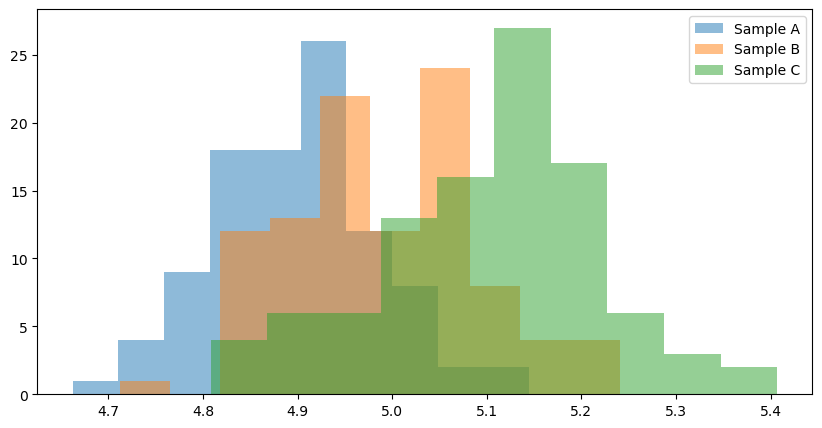

In [9]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_a, bins=10, alpha=0.5, label='Sample A')

# Histogram of the second sample.
ax.hist(sample_b, bins=10, alpha=0.5, label='Sample B')

# Histogram of the third sample.
ax.hist(sample_c, bins=10, alpha=0.5, label='Sample C')

# Add a legend
ax.legend();

STEP NO3: Create a loop to perform a one-way anova test on the three samples 10,000 times. 

In [21]:
# Import the oneway ANOVA module from Scipy Stats
from scipy.stats import f_oneway

# Number of times to peform the test.
iterations = 100000

# Loop for 100000 tests.
for _ in range(iterations):
    # Perform one-way ANOVA.
    f, p = stats.f_oneway(sample_a, sample_b, sample_c)

    # Check for Type II error: null hypothesis is false (means are different),
    # but p-value is greater than 0.05 (failed to reject null).
    if p > 0.05:
        no_type_ii += 1

# Display results
print(f"Number of Type II errors: {no_type_ii}")
print(f"Type II error rate: {no_type_ii / iterations}")
print (f"p-value: {p}")
print(f"F-statistic: {f}")

Number of Type II errors: 0
Type II error rate: 0.0
p-value: 4.417312772376806e-34
F-statistic: 100.57961357249692


The null hypothesis was always correctly rejected. In fact, all the 100,000 tests conducted successfully identified any false null hypothesis when it was indeed false and there were no cases where the null hypothesis was incorrectly accepted when it was actually false.

The F-statistic of 100.58 is very high and this suggests that the group means are likely to be significantly different from each other. This result is correct and aligned with way the samples were generated. On the other hand, a p-value of 4.42e-34 is extremely small (far less than the common significance threshold of 0.05). A very low p-value means that the probability of observing differences between the means of the three means is statistically significant and this is also, aligned with how the arrays were created.

**The null hypothesis was then always correctly rejected.** 

=> In fact, all the 100,000 tests conducted successfully identified a difference in the mean of the three samples and the incorrect null hypothesis that the mean of group was equal was never accepted as true.



____

## End